In [43]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [44]:
np.random.seed(0)


In [45]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [46]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Sprawdzenie poprawności zbiorów

In [47]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimension is not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimension is not 28x28"

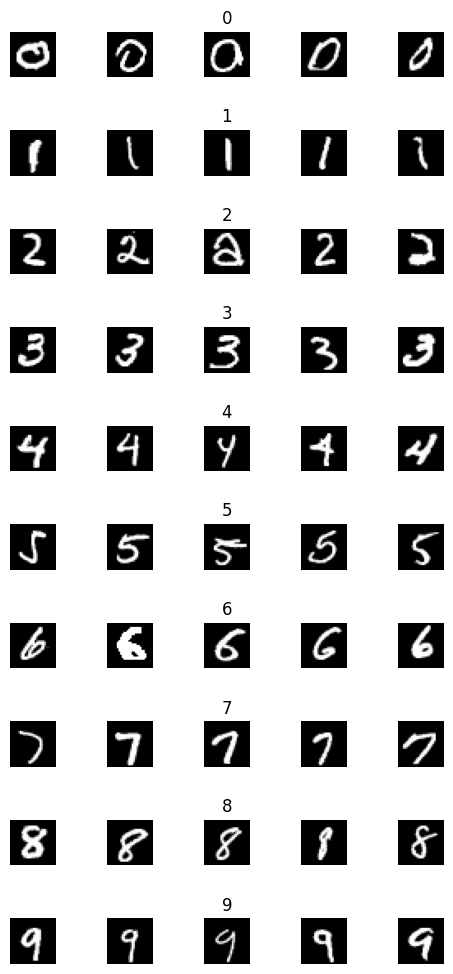

In [48]:
num_of_samples = []
cols = 5
num_classes = 10

fig, axis = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap='gray')
        axis[j][i].axis("off")
        if i == 2:
            axis[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

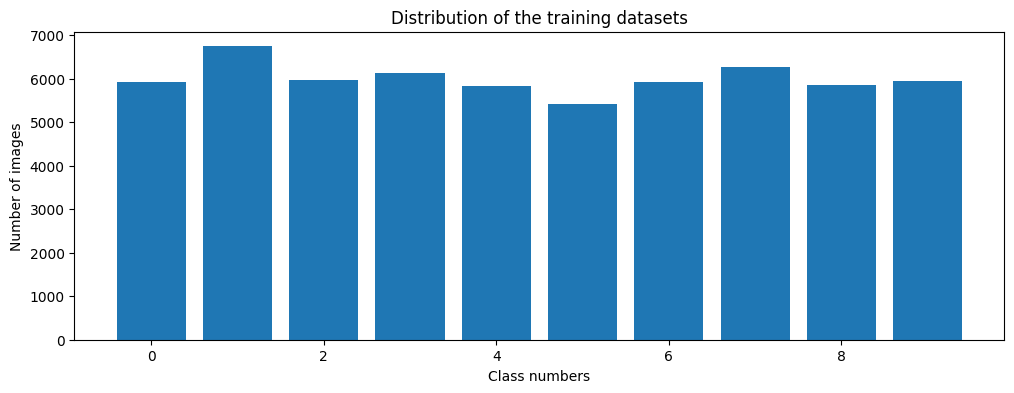

In [49]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training datasets")
plt.xlabel("Class numbers")
plt.ylabel("Number of images")

In [50]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Normalizacja (żeby maksymalna wartość pixela wynosiła 1, a nie 255 ) \
Jest to ważne dla `obliczeń matematycznych`

In [51]:
X_train = X_train/255
X_test = X_test/255

In [52]:
num_pixels = 28**2
X_train = X_train.reshape(X_train.shape[0], num_pixels)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [53]:
def create_model():
    model = Sequential()
    model.add(Dense(num_classes, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [54]:
model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
history = model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=10, batch_size= 200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 1s 2ms/step - loss: 0.6862 - accuracy: 0.7847 - val_loss: 0.3479 - val_accuracy: 0.8972
Epoch 2/10
270/270 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8887 - val_loss: 0.2878 - val_accuracy: 0.9140
Epoch 3/10
270/270 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.9035 - val_loss: 0.2645 - val_accuracy: 0.9205
Epoch 4/10
270/270 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.9054 - val_loss: 0.2529 - val_accuracy: 0.9238
Epoch 5/10
270/270 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.9086 - val_loss: 0.2616 - val_accuracy: 0.9230
Epoch 6/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2979 - accuracy: 0.9116 - val_loss: 0.2453 - val_accuracy: 0.9257
Epoch 7/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.9112 - val_loss: 0.2519 - val_accuracy: 0.9230
Epoch 

Text(0.5, 0, 'epoch')

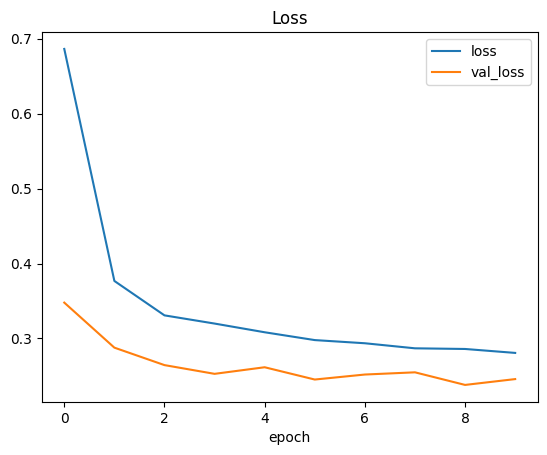

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

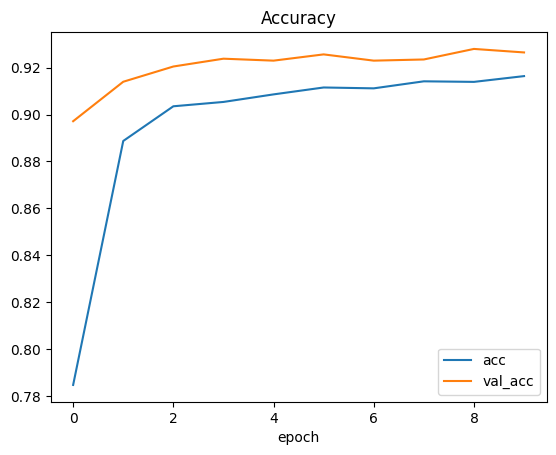

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [59]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test score: ", score[0])
print("Test accuracy", score[1])
print(score)

Test score:  0.2996862530708313
Test accuracy 0.9125999808311462
[0.2996862530708313, 0.9125999808311462]


Na nastęny film: 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'

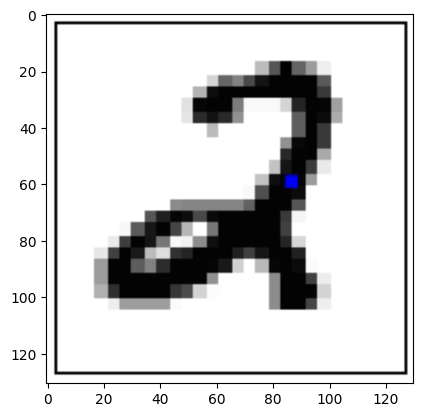

In [62]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

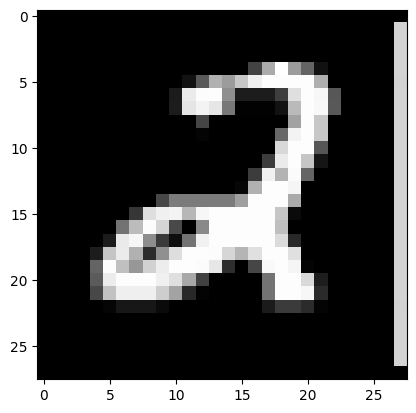

In [68]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap='gray')

In [69]:
image = image/255
image = image.reshape(1,28**2)


In [70]:
prediction = np.argmax(model.predict(image), axis=1)
print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 58ms/step
predicted digit: [2]
